## Observations and Insights 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_dataset = pd.merge(mouse_metadata, study_results, how ='inner', on="Mouse ID")

# Display the data table for preview
merged_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mice_count = merged_dataset["Mouse ID"].count()
mice_count

1893

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID_Time = merged_dataset[merged_dataset.duplicated(['Mouse ID','Timepoint'])]
dup_mice_ID_Time


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_ID =  merged_dataset[merged_dataset.duplicated('Mouse ID')]
dup_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_dataset.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.
clean_df_mice_count = clean_df['Mouse ID'].count()
#Print the number of mice in the clean DataFrame.
clean_df_mice_count

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Mean calculation
mean = merged_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

#Median calculation
median = merged_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

#Variance calculation
variance = merged_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

#Standard deviation
std = merged_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

#SEM (Standard error of the Mean)
sem = merged_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":std,"SEM":sem})
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_data = merged_dataset.groupby('Drug Regimen').agg(
    Mean= ('Tumor Volume (mm3)', 'mean'),
    Median = ('Tumor Volume (mm3)', 'median'),
    Variance = ('Tumor Volume (mm3)', 'var'),
    StandardDeviation = ('Tumor Volume (mm3)', 'std'),
    SEM = ('Tumor Volume (mm3)', 'sem')
    )
display(summary_statistics_data)

,Mean,Median,Variance,StandardDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

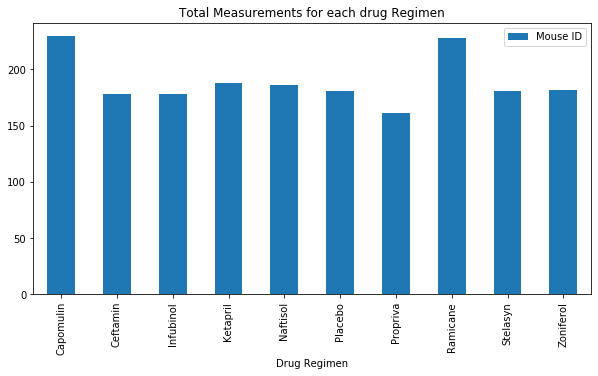

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_per_regimen = pd.DataFrame(merged_dataset.groupby('Drug Regimen').count()).reset_index()
measurements_per_regimen_df = measurements_per_regimen[['Drug Regimen', 'Mouse ID']]
measurements_per_regimen_df = measurements_per_regimen_df.set_index('Drug Regimen')
measurements_per_regimen_plot = measurements_per_regimen_df.plot(kind="bar", figsize=(10,5))
plt.title("Total Measurements for each drug Regimen")
plt.show()

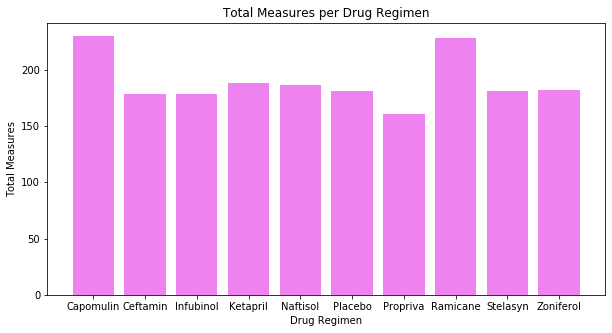

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen_list = summary_statistics_data.index.tolist()
drug_regimen_count = (merged_dataset.groupby('Drug Regimen')['Mouse ID'].count()).tolist()
plt.figure(figsize=(10, 5))
plt.title('Total Measures per Drug Regimen')
plt.ylabel('Total Measures')
plt.xlabel('Drug Regimen')
plt.bar(drug_regimen_list,drug_regimen_count, color='violet', align='center')
plt.show()

Mice Count: Male      125
Female    124
Name: Sex, dtype: int64


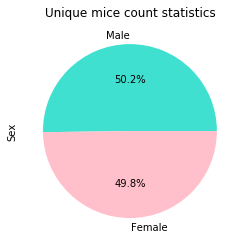

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Showing unique value counts for male vs female mice on cleaned data frame
mice_unique_count = clean_df['Sex'].value_counts()
print("Mice Count:", mice_unique_count)

mice_unique_count.plot(kind='pie',colors= ['turquoise', 'pink'], autopct = '%1.1f%%')
plt.title("Unique mice count statistics")
plt.show()


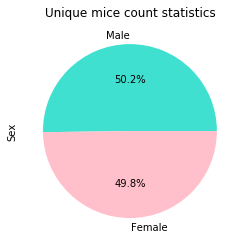

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Showing unique value counts for male vs female mice on cleaned data frame
mice_count_list= mice_unique_count.tolist()
mice_sex_categories = mice_unique_count.index.tolist()
plt.pie(mice_count_list, labels = mice_sex_categories,colors= ['turquoise', 'pink'], autopct = '%1.1f%%')
plt.title("Unique mice count statistics")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
